In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime
df = pd.read_csv("Bishkek.csv")
df

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,year,date,source,condition
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,12,14,2023.0,2023-02-04 20:05:01,Site,под самоотделку (ПСО)
1,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:49,Site,под самоотделку (ПСО)
2,57750,750,77,2,Октябрьский район,Магистраль,монолитный,5,12,2023.0,2023-02-04 20:04:37,Site,под самоотделку (ПСО)
3,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:01,Site,под самоотделку (ПСО)
4,55000,1279,43,1,Ленинский район,Академия Наук,кирпичный,1,12,2013.0,2023-02-04 20:02:37,Site,хорошее
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45000,881,51,1,Октябрьский район,NaN,панельный,9,9,2021.0,2022-11-30 00:40:24,Android,евроремонт
9996,150000,1456,103,3,Октябрьский район,Магистраль,монолитный,3,12,2019.0,2022-11-30 00:03:22,Site,NaN
9997,120000,1143,105,5,Ленинский район,Московская - Белинка,кирпичный,5,6,1990.0,2022-11-29 23:52:23,Site,хорошее
9998,62000,969,64,2,Октябрьский район,Тунгуч м-н,монолитный,6,12,NaN,2022-11-29 23:21:20,Android,евроремонт


## 1. Data Collection

To build a reliable house price prediction model, it is essential to collect high-quality and relevant datasets.  
For this project, I focused on gathering data related to **real estate in Kyrgyzstan**, particularly in **Bishkek**,  
as well as supporting datasets that reflect **economic** and **demographic indicators** that may influence housing prices.

---

### 🔹 Main Dataset

- **Source**: *Kaggle / Local Open Data Portals / Real Estate Websites*  
- **Filename**: `Bishkek.csv`  
- **Description**: This dataset contains listings of apartments for sale in Bishkek.  
  It includes the following features:

| Column Name       | Description                                                 |
|-------------------|-------------------------------------------------------------|
| `price`           | Total price of the apartment (in KGS)                       |
| `m2_price`        | Price per square meter                                      |
| `square`          | Total area of the apartment in square meters                |
| `rooms`           | Number of rooms                                             |
| `district`        | Administrative district of Bishkek                          |
| `micro_district`  | Sub-district or neighborhood within the city                |
| `building_type`   | Type of the building (e.g., panel, brick, monolithic)       |
| `floor`           | The floor the apartment is located on                       |
| `floors`          | Total number of floors in the building                      |
| `year`            | Year the building was constructed                           |
| `date`            | Date the listing was posted                                 |
| `source`          | Source website or platform from which the data was collected |
| `condition`       | Condition of the apartment (e.g., renovated, under repair)  |

---

This dataset provides detailed property-level information,  
which is essential for analyzing trends in the real estate market and for building accurate predictive models.

## 2. Data Preprocessing

Before building any machine learning model, it is essential to preprocess the data to ensure quality and consistency.  
In this stage, I performed several steps to clean and prepare the dataset for analysis and modeling.

---

### 🔹 Handling Missing Values

- Checked for null or missing values using `.isnull().sum()`.
- Missing values in non-critical columns (e.g., `micro_district`, `year`) were either filled with appropriate defaults (such as mode or median) or dropped depending on their impact.

---

### 🔹 Removing Duplicates

- Duplicate rows were identified using `.duplicated()` and removed to avoid bias and redundancy.

---

### 🔹 Dealing with Outliers

- Outliers in columns like `price`, `m2_price`, and `square` were identified using boxplots and statistical thresholds (e.g., IQR method).
- Extreme values that were clearly errors (e.g., apartments with 1 m² or 1,000,000 KGS per m²) were removed or capped.

---

### 🔹 Feature Engineering

- Created a new feature: `price_per_room = price / rooms`, to capture affordability.
- Converted `year` to `building_age = current_year - year`, making it more interpretable.
- Encoded categorical variables such as `district`, `building_type`, and `condition` using label encoding or one-hot encoding, depending on the model needs.

---
### 🔹 Normalization / Standardization
- For some models (e.g., linear regression or KNN), numeric features such as `square`, `price`, and `m2_price` were standardized using `StandardScaler` to improve model performance.

---

These preprocessing steps helped ensure that the dataset is clean, consistent, and ready for exploratory analysis and modeling.

#### Handling Missing Values

In [232]:
print("\nNumber of missing values:")
print(df.isnull().sum())


Number of missing values:
price                0
m2_price             0
square               0
rooms                0
district            10
micro_district     457
building_type        0
floor                0
floors               0
year              4369
date                 0
source               0
condition         2919
dtype: int64


In [233]:
df["condition"] = df["condition"].fillna(df["condition"].mode()[0])# fill with the mode
df["micro_district"] = df["micro_district"].fillna(df["micro_district"].mode()[0]) # fill with the mode
df["district"] = df["district"].fillna(df["district"].mode()[0])
df['year'] = df.groupby('district')['year'].transform(lambda x: x.fillna(x.median())) # Fill in the median for the area (if the area is known)

In [234]:
# no missing values!!
print("\nNumber of missing values:")
print(df.isnull().sum())


Number of missing values:
price             0
m2_price          0
square            0
rooms             0
district          0
micro_district    0
building_type     0
floor             0
floors            0
year              0
date              0
source            0
condition         0
dtype: int64


#### Removing Duplicates

In [235]:
print("\nNumber of duplicates:")
print(df.duplicated().sum())


Number of duplicates:
0


####  Dealing with Outliers

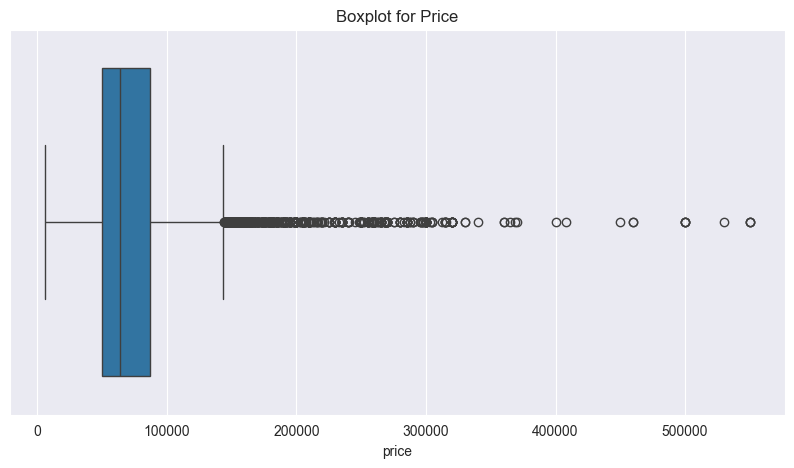

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title("Boxplot for Price")
plt.show()

In [237]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filtering outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 769


In [238]:
# filtering and deleting very expansive ones(outliers)
df = df[~df['price'].between(300000, 550000)]

In [239]:
df["price"].max()

np.int64(299500)

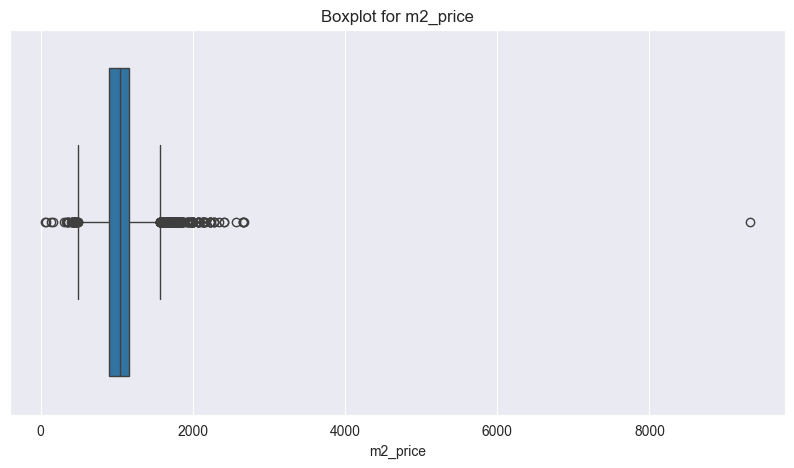

In [240]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['m2_price'])
plt.title("Boxplot for m2_price")
plt.show()

In [241]:
Q1 = df['m2_price'].quantile(0.25)
Q3 = df['m2_price'].quantile(0.75)
IQR = Q3 - Q1

# bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filtering outliers
outliers = df[(df['m2_price'] < lower_bound) | (df['m2_price'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 286


In [242]:
# deleting outliers because its only 2.9 person
df = df[(df['m2_price'] >= lower_bound) & (df['m2_price'] <= upper_bound)]

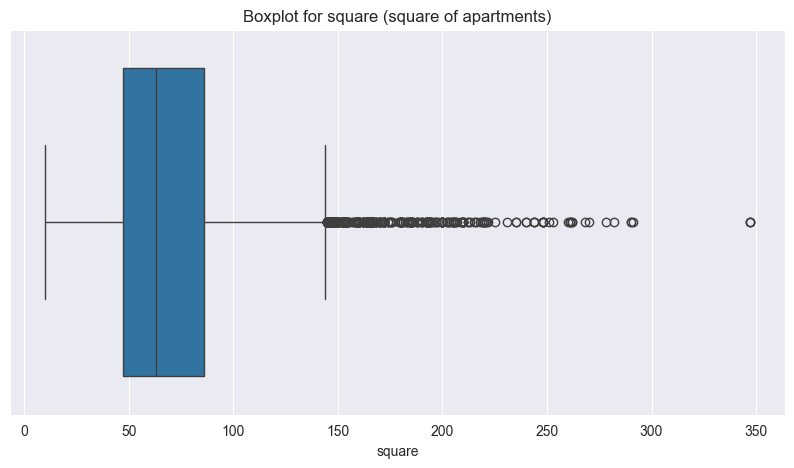

In [243]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['square'])
plt.title("Boxplot for square (square of apartments)")
plt.show()

In [244]:
# sorting 
top_squares = df.sort_values(by='square', ascending=False).head(20)
print(top_squares[['square', 'price']])

      square   price
2284     347  235000
6149     347  186000
6147     347  186000
847      291  198000
5978     290  195000
4206     290  198000
9036     282  260000
7063     278  248000
1750     270  216000
4241     268  280000
5180     262  209600
5151     262  209600
4421     261  260000
2337     261  240000
2758     261  260000
3038     260  285000
7620     253  195000
9536     251  251000
7948     248  198500
1528     248  219000


#### Feature Engineering

In [245]:
#replasing column year to the new column "building_age"
from datetime import datetime

current_year = datetime.now().year
df['building_age'] = current_year - df['year']
df['building_age'] = (current_year - df['year']).astype(int)
df.drop(columns=['year'], inplace=True)

df.head()

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,date,source,condition,building_age
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,12,14,2023-02-04 20:05:01,Site,под самоотделку (ПСО),2
1,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023-02-04 20:04:49,Site,под самоотделку (ПСО),2
2,57750,750,77,2,Октябрьский район,Магистраль,монолитный,5,12,2023-02-04 20:04:37,Site,под самоотделку (ПСО),2
3,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023-02-04 20:04:01,Site,под самоотделку (ПСО),2
4,55000,1279,43,1,Ленинский район,Академия Наук,кирпичный,1,12,2023-02-04 20:02:37,Site,хорошее,12


In [246]:
# creating new column'floor/floors'
df['floor_to_floors'] = df['floor'] / df['floors']
df

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,date,source,condition,building_age,floor_to_floors
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,12,14,2023-02-04 20:05:01,Site,под самоотделку (ПСО),2,0.857143
1,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023-02-04 20:04:49,Site,под самоотделку (ПСО),2,0.416667
2,57750,750,77,2,Октябрьский район,Магистраль,монолитный,5,12,2023-02-04 20:04:37,Site,под самоотделку (ПСО),2,0.416667
3,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023-02-04 20:04:01,Site,под самоотделку (ПСО),2,0.416667
4,55000,1279,43,1,Ленинский район,Академия Наук,кирпичный,1,12,2023-02-04 20:02:37,Site,хорошее,12,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45000,881,51,1,Октябрьский район,Магистраль,панельный,9,9,2022-11-30 00:40:24,Android,евроремонт,4,1.000000
9996,150000,1456,103,3,Октябрьский район,Магистраль,монолитный,3,12,2022-11-30 00:03:22,Site,евроремонт,6,0.250000
9997,120000,1143,105,5,Ленинский район,Московская - Белинка,кирпичный,5,6,2022-11-29 23:52:23,Site,хорошее,35,0.833333
9998,62000,969,64,2,Октябрьский район,Тунгуч м-н,монолитный,6,12,2022-11-29 23:21:20,Android,евроремонт,4,0.500000


In [247]:
# Ensure columns are numeric
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
df['floors'] = pd.to_numeric(df['floors'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['floor', 'floors'])

# Calculate the middle floor
middle_floor = df['floors'] / 2

# Create a new column: 1 = good floor, 0 = bad floor
df['is_good_floor'] = ((df['floor'] > 1) & (df['floor'] <= middle_floor)).astype(int)

# Preview the result
df.head()


,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,date,source,condition,building_age,floor_to_floors,is_good_floor
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,12,14,2023-02-04 20:05:01,Site,под самоотделку (ПСО),2,0.857143,0
1,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023-02-04 20:04:49,Site,под самоотделку (ПСО),2,0.416667,1
2,57750,750,77,2,Октябрьский район,Магистраль,монолитный,5,12,2023-02-04 20:04:37,Site,под самоотделку (ПСО),2,0.416667,1
3,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023-02-04 20:04:01,Site,под самоотделку (ПСО),2,0.416667,1
4,55000,1279,43,1,Ленинский район,Академия Наук,кирпичный,1,12,2023-02-04 20:02:37,Site,хорошее,12,0.083333,0


In [248]:
df["district"].unique()

array(['Октябрьский район', 'Ленинский район', 'Первомайский район',
       'Свердловский район'], dtype=object)

In [249]:
# We group the data by regions and calculate the lowest price for each region
average_price_per_district = df.groupby('district')['price'].mean()

sorted_average_price = average_price_per_district.sort_values(ascending=False)

print(round(sorted_average_price, 2))

district
Первомайский район    80174.16
Ленинский район       74353.82
Октябрьский район     71138.02
Свердловский район    63671.29
Name: price, dtype: float64


In [250]:
#converted to number numeric  format
#we converted to number by looking at above table , the higher the better
# the higher number is better  district
def assign_district_price_rating(district):
    if district == 'Первомайский район':
        return 3
    elif district == 'Ленинский район':
        return 2
    elif district == 'Октябрьский район':
        return 1
    elif district == 'Свердловский район':
        return 0
    else:
        return None
df['district'] = df['district'].apply(assign_district_price_rating)
df.head()

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,date,source,condition,building_age,floor_to_floors,is_good_floor
0,110880,720,154,4,1,Магистраль,кирпичный,12,14,2023-02-04 20:05:01,Site,под самоотделку (ПСО),2,0.857143,0
1,57000,740,77,2,1,Магистраль,кирпичный,5,12,2023-02-04 20:04:49,Site,под самоотделку (ПСО),2,0.416667,1
2,57750,750,77,2,1,Магистраль,монолитный,5,12,2023-02-04 20:04:37,Site,под самоотделку (ПСО),2,0.416667,1
3,57000,740,77,2,1,Магистраль,кирпичный,5,12,2023-02-04 20:04:01,Site,под самоотделку (ПСО),2,0.416667,1
4,55000,1279,43,1,2,Академия Наук,кирпичный,1,12,2023-02-04 20:02:37,Site,хорошее,12,0.083333,0


In [251]:
df["micro_district"].unique()

array(['Магистраль', 'Академия Наук', 'ЖД вокзал', 'Аламедин-1 м-н',
       '6 м-н', 'Кок-Жар ж/м', 'Асанбай м-н', 'Джал-23 м-н (Нижний Джал)',
       'Военторг', 'АЮ Grand', 'Восток-5 м-н', 'Молодая Гвардия',
       'Верхний Джал м-н', 'КНУ', '4 м-н', 'Политех', 'Джал 15 м-н',
       'Ипподром', 'Площадь Победы', '11 м-н', 'Мед. академия',
       'Моссовет', 'Горького - Панфилова', 'Ак Кеме',
       'Московская - Белинка', 'Старый аэропорт', 'АУЦА', '12 м-н',
       'Гоин', 'Московская - Уметалиева', 'Парк Ататюрк',
       'Жилгородок Ницца', 'Карла Маркса', 'ЦУМ', 'Сквер Тоголок Молдо',
       'Бишкек-Парк', 'Душанбинка', 'Восточный автовокзал',
       'Центральная мечеть', 'Юбилейка', 'Космос', '8 м-н',
       'Кара-Жыгач ж/м', 'Джальская больница', 'Средний Джал м-н',
       'Золотой квадрат', 'Ден Сяопина - Фучика', 'Нижний Токольдош',
       '5 м-н', 'Матросова', 'Парк Панфилова/Спартак', '7 м-н',
       'Карпинка', 'Кудайберген', 'Джал-29 м-н', 'Улан м-н', 'Пишпек ж/м',
       '

In [252]:
# We group the data by regions and calculate the lowest price for each region
average_price_per_district = df.groupby('micro_district')['price'].mean()

sorted_average_price = average_price_per_district.sort_values(ascending=False)

print(round(sorted_average_price, 2))

micro_district
с. Орто-Сай         260000.00
Ала-Арча ж/м        202000.00
Киргизия 1 ж/м      138062.38
Жилгородок Ницца    128750.00
Дворец спорта       121740.53
                      ...    
Касым ж/м            32750.00
Щербакова ж/м        32190.00
Старый толчок        28000.00
Рухий Мурас ж/м      25250.00
Салам-Алик ж/м       19500.00
Name: price, Length: 130, dtype: float64


In [253]:
#converted to number numeric format
#we converted to number by looking at above table , the higher the better
# the higher number is better micro district
def assign_district_group(district):
    if district in ['Золотой квадрат', 'Асанбай м-н', 'Бишкек-Парк', 'ЦУМ', 'Орозбекова - Жибек-Жолу', 
                    'Горького - Панфилова', 'Московская - Белинка', 'Московская - Уметалиева', 
                    'Парк Панфилова/Спартак', 'Филармония']:
        return 4  # most expensive
    elif district in ['Академия Наук', 'КНУ', 'АУЦА', 'Дворец спорта', 'Мед. академия', 'Ак Кеме', 
                      'Молодая Гвардия', 'Восток-5 м-н', 'Юг-2 м-н', 'Кок-Жар м-н', 'Центральная мечеть', 
                      'Парк Ататюрк', 'Ген прокуратура']:
        return 3  # high price
    elif district in ['4 м-н', '5 м-н', '6 м-н', '7 м-н', '8 м-н', '9 м-н', '10 м-н', '11 м-н', '12 м-н', 
                      'Джал 15 м-н', 'Джал-23 м-н (Нижний Джал)', 'Джал-29 м-н', 'Джал-30 м-н', 'Средний Джал м-н', 
                      'Верхний Джал м-н', 'Улан м-н', 'Тунгуч м-н', 'Аламедин-1 м-н', 'Политех', 'КГУСТА', 
                      'БГУ', 'Азия Молл', 'Советская - Скрябина', 'Карпинка', 'Матросова']:
        return 2  # middle price
    elif district in ['ЖД вокзал', 'Военторг', 'АЮ Grand', 'Ипподром', 'Площадь Победы', 'Моссовет', 
                      'Старый аэропорт', 'Гоин', 'Душанбинка', 'Восточный автовокзал', 'Юбилейка', 'Космос', 
                      'Кара-Жыгач ж/м', 'Джальская больница', 'Нижний Токольдош', 'Кудайберген', 'Пишпек ж/м', 
                      'ТЭЦ', 'VEFA', 'Щербакова ж/м', 'Ак Эмир рынок', 'Госрегистр', 'Церковь', 'Чуй - Алматинка', 
                      'Западный автовокзал', 'Таатан', 'Гагарина', 'Учкун м-н', 'Городок энергетиков', 
                      'Аламединский рынок', 'Жилгородок Совмина ж/м', 'Улан-2 м-н']:
        return 1  # under middle
    else:
        return 0  # cheapest

df['micro_district'] = df['micro_district'].apply(assign_district_group)
df.head()

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,date,source,condition,building_age,floor_to_floors,is_good_floor
0,110880,720,154,4,1,0,кирпичный,12,14,2023-02-04 20:05:01,Site,под самоотделку (ПСО),2,0.857143,0
1,57000,740,77,2,1,0,кирпичный,5,12,2023-02-04 20:04:49,Site,под самоотделку (ПСО),2,0.416667,1
2,57750,750,77,2,1,0,монолитный,5,12,2023-02-04 20:04:37,Site,под самоотделку (ПСО),2,0.416667,1
3,57000,740,77,2,1,0,кирпичный,5,12,2023-02-04 20:04:01,Site,под самоотделку (ПСО),2,0.416667,1
4,55000,1279,43,1,2,3,кирпичный,1,12,2023-02-04 20:02:37,Site,хорошее,12,0.083333,0


In [254]:
df["micro_district"].unique()

array([0, 3, 1, 2, 4])

In [255]:
df.groupby('building_type')['m2_price'].mean().loc[['кирпичный', 'монолитный', 'панельный']]

building_type
кирпичный     1017.760934
монолитный    1011.499890
панельный     1073.063584
Name: m2_price, dtype: float64

In [256]:
# the higher number is more expensive and better
df['building_type'] = df['building_type'].apply(
    lambda x: 2 if x == 'кирпичный' else (1 if x == 'монолитный' else (0 if x == 'панельный' else x))
)
df.head()

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,date,source,condition,building_age,floor_to_floors,is_good_floor
0,110880,720,154,4,1,0,2,12,14,2023-02-04 20:05:01,Site,под самоотделку (ПСО),2,0.857143,0
1,57000,740,77,2,1,0,2,5,12,2023-02-04 20:04:49,Site,под самоотделку (ПСО),2,0.416667,1
2,57750,750,77,2,1,0,1,5,12,2023-02-04 20:04:37,Site,под самоотделку (ПСО),2,0.416667,1
3,57000,740,77,2,1,0,2,5,12,2023-02-04 20:04:01,Site,под самоотделку (ПСО),2,0.416667,1
4,55000,1279,43,1,2,3,2,1,12,2023-02-04 20:02:37,Site,хорошее,12,0.083333,0


In [257]:
df["building_type"].unique()

array([2, 1, 0])

In [258]:
df["condition"].unique()

array(['под самоотделку (ПСО)', 'хорошее', 'евроремонт', 'среднее',
       'не достроено', 'требует ремонта', 'черновая отделка',
       'свободная планировка'], dtype=object)

In [259]:
df.groupby('condition')['m2_price'].mean().sort_values(ascending=False)

condition
свободная планировка     1164.333333
хорошее                  1075.132691
евроремонт               1063.629630
среднее                  1062.398165
требует ремонта          1021.938547
под самоотделку (ПСО)     877.748929
черновая отделка          838.111111
не достроено              775.200000
Name: m2_price, dtype: float64

In [260]:
df['condition'] = df['condition'].apply(lambda x: 0 if x == 'не достроено' else
                                         3 if x == 'требует ремонта' else
                                         1 if x == 'черновая отделка' else
                                         2 if x == 'под самоотделку (ПСО)' else
                                         7 if x == 'свободная планировка' else
                                         4 if x == 'среднее' else
                                         6 if x == 'хорошее' else
                                         5 if x == 'евроремонт' else None)
df.head()
                                            

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,date,source,condition,building_age,floor_to_floors,is_good_floor
0,110880,720,154,4,1,0,2,12,14,2023-02-04 20:05:01,Site,2,2,0.857143,0
1,57000,740,77,2,1,0,2,5,12,2023-02-04 20:04:49,Site,2,2,0.416667,1
2,57750,750,77,2,1,0,1,5,12,2023-02-04 20:04:37,Site,2,2,0.416667,1
3,57000,740,77,2,1,0,2,5,12,2023-02-04 20:04:01,Site,2,2,0.416667,1
4,55000,1279,43,1,2,3,2,1,12,2023-02-04 20:02:37,Site,6,12,0.083333,0


In [261]:
#prosssed dataset
df.drop(columns=["source","date"], inplace=True)# not need columns
df

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,condition,building_age,floor_to_floors,is_good_floor
0,110880,720,154,4,1,0,2,12,14,2,2,0.857143,0
1,57000,740,77,2,1,0,2,5,12,2,2,0.416667,1
2,57750,750,77,2,1,0,1,5,12,2,2,0.416667,1
3,57000,740,77,2,1,0,2,5,12,2,2,0.416667,1
4,55000,1279,43,1,2,3,2,1,12,6,12,0.083333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45000,881,51,1,1,0,0,9,9,5,4,1.000000,0
9996,150000,1456,103,3,1,0,1,3,12,5,6,0.250000,1
9997,120000,1143,105,5,2,4,2,5,6,6,35,0.833333,0
9998,62000,969,64,2,1,2,1,6,12,5,4,0.500000,1


#### Normalization / Standardization

In [269]:
df1 = pd.read_csv("Preprocessed_before_standardization_and_normalization.csv")
df1

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,condition,building_age,floor_to_floors,is_good_floor
0,110880,720,154,4,1,0,2,12,14,2,2,0.857143,0
1,57000,740,77,2,1,0,2,5,12,2,2,0.416667,1
2,57750,750,77,2,1,0,1,5,12,2,2,0.416667,1
3,57000,740,77,2,1,0,2,5,12,2,2,0.416667,1
4,55000,1279,43,1,2,3,2,1,12,6,12,0.083333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,45000,881,51,1,1,0,0,9,9,5,4,1.000000,0
9660,150000,1456,103,3,1,0,1,3,12,5,6,0.250000,1
9661,120000,1143,105,5,2,4,2,5,6,6,35,0.833333,0
9662,62000,969,64,2,1,2,1,6,12,5,4,0.500000,1




### 📌 Standardization means scaling numeric features to have:

### 💡 Why do we need it?

#### ✅ 1. **Different feature scales can mislead the model**
- Example: `square` ranges from 30–150, while `building_age` ranges from 0–50.
- Models like **linear regression**, **SVM**, or **k-NN** are sensitive to scale and may give **more weight** to features with larger numeric ranges — even if they’re not more important.

---

#### ✅ 2. **Gradient descent converges faster**
- Optimization algorithms like **SGD** or **Adam** work best when features are on similar scales.
- Standardization ensures **faster and more stable training**.

---

#### ✅ 3. **Improves model performance**
Especially important for algorithms such as:
- Linear/Logistic Regression
- Support Vector Machines (SVM)
- k-Nearest Neighbors (k-NN)
- PCA and other dimensionality reduction methods

---

### ⚠️ When standardization is **not necessary**:
- Tree-based models like **Decision Trees**, **Random Forest**, and **Gradient Boosting** are **not affected** by feature scale.
- These models split data based on feature thresholds, not distances or gradients.

---

### 🧠 Conclusion:
> **Standardization is crucial when your model is sensitive to feature scale** — it ensures fair, accurate, and efficient learning.



In [276]:
from sklearn.preprocessing import StandardScaler
# We select ONLY real numerical features
features_to_scale = ['square', 'price', 'm2_price', 'building_age',]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,condition,building_age,floor_to_floors,is_good_floor
0,1.052655,-1.571513,2.410565,4,1,0,2,12,14,2,-0.147061,0.857143,0
1,-0.425560,-1.469033,0.160693,2,1,0,2,5,12,2,-0.147061,0.416667,1
2,-0.404984,-1.417792,0.160693,2,1,0,1,5,12,2,-0.147061,0.416667,1
3,-0.425560,-1.469033,0.160693,2,1,0,2,5,12,2,-0.147061,0.416667,1
4,-0.480431,1.292817,-0.832757,1,2,3,2,1,12,6,0.065598,0.083333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.754784,-0.746545,-0.599004,1,1,0,0,9,9,5,-0.104530,1.000000,0
9996,2.125925,2.199769,0.920390,3,1,0,1,3,12,5,-0.061998,0.250000,1
9997,1.302865,0.595949,0.978828,5,2,4,2,5,6,6,0.554714,0.833333,0
9998,-0.288384,-0.295631,-0.219155,2,1,2,1,6,12,5,-0.104530,0.500000,1


In [277]:
df.to_csv('Standardizated.csv', index=False)

In [278]:
df2 = pd.read_csv("Standardizated.csv")
df2

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,condition,building_age,floor_to_floors,is_good_floor
0,1.052655,-1.571513,2.410565,4,1,0,2,12,14,2,-0.147061,0.857143,0
1,-0.425560,-1.469033,0.160693,2,1,0,2,5,12,2,-0.147061,0.416667,1
2,-0.404984,-1.417792,0.160693,2,1,0,1,5,12,2,-0.147061,0.416667,1
3,-0.425560,-1.469033,0.160693,2,1,0,2,5,12,2,-0.147061,0.416667,1
4,-0.480431,1.292817,-0.832757,1,2,3,2,1,12,6,0.065598,0.083333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,-0.754784,-0.746545,-0.599004,1,1,0,0,9,9,5,-0.104530,1.000000,0
9660,2.125925,2.199769,0.920390,3,1,0,1,3,12,5,-0.061998,0.250000,1
9661,1.302865,0.595949,0.978828,5,2,4,2,5,6,6,0.554714,0.833333,0
9662,-0.288384,-0.295631,-0.219155,2,1,2,1,6,12,5,-0.104530,0.500000,1


12
